<a href="https://colab.research.google.com/github/jserrataylor/cursoAI/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos de Regresión**

Los modelos de regresión son una clase fundamental de métodos estadísticos y de aprendizaje automático que se utilizan para predecir una **variable objetivo (dependiente)** basándose en una o más **variables predictoras (independientes)**.

Estos modelos proporcionan una herramienta esencial para comprender y predecir comportamientos y tendencias basándose en datos históricos y observaciones.

Los orígenes de la regresión se remontan al siglo XIX, y desde entonces, estos modelos han encontrado aplicación en una amplia gama de campos.

### Orígenes y Desarrollo Histórico
1. **Francis Galton (1822-1911)**: El término "regresión" fue acuñado por el científico inglés Francis Galton en el contexto de sus estudios sobre herencia y características biológicas. Galton observó que, aunque las características físicas de los padres (como la altura) tendían a ser heredadas por sus hijos, también había una tendencia a "regresar" a la media de la población, un fenómeno que él llamó "regresión hacia la mediocridad" (más tarde conocido como "regresión a la media").

2. **Karl Pearson y Sir Francis Galton**: Karl Pearson, colaborador y sucesor de Galton, junto con otros estadísticos, desarrollaron formalmente los conceptos y métodos matemáticos de la regresión y la correlación.

### Tipos de Modelos de Regresión
- **Regresión Lineal Simple**: Usa una sola variable predictora para predecir una variable dependiente, con la relación modelada como una línea recta.
- **Regresión Lineal Múltiple**: Extiende la regresión lineal simple al incluir múltiples variables predictoras.
- **Regresión Logística**: Se usa para predecir una variable dependiente binaria (con dos posibles valores, como "sí" o "no").
- **Regresión Polinómica**: Modela la relación como un polinomio, permitiendo curvas en lugar de líneas rectas.
- **Otros tipos**: Incluyen regresión de Ridge, regresión LASSO, regresión no lineal, entre otros.

### Aplicaciones
Los modelos de regresión se utilizan en prácticamente todos los campos, desde la ciencia y la ingeniería hasta la economía y las ciencias sociales. Algunas aplicaciones comunes incluyen:

- **Predicción**: Estimar valores futuros basándose en datos históricos.
- **Análisis de tendencias**: Observar cómo cambian las cosas a lo largo del tiempo.
- **Control de calidad**: Evaluar la eficacia de los procesos de control de calidad.
- **Investigación científica**: Estudiar las relaciones entre variables en experimentos científicos.
- **Economía y negocios**: Predecir ventas, ingresos, demanda de productos, entre otros.

# **Regresión Lineal**

El **análisis de regresión**, especialmente la **regresión lineal**, se basa en varias suposiciones clave. Estas suposiciones son fundamentales para la validez de los resultados y conclusiones del análisis.

Estas suposiciones son cruciales para la interpretación adecuada y la validez de los resultados del análisis de regresión. Sin embargo, es importante recordar que en la práctica, es poco probable que todas estas suposiciones se cumplan perfectamente. En tales casos, se pueden aplicar técnicas de diagnóstico y métodos estadísticos alternativos para abordar las violaciones de estas suposiciones.

## **Suposiciones** principales:

1. **Relación Lineal**: La relación entre la variable dependiente y las variables independientes debe ser lineal. Esto significa que un cambio en una variable independiente se asocia con un cambio proporcional en la variable dependiente. Esta suposición se puede verificar visualmente usando diagramas de dispersión.

2. **Normalidad**: Se asume que los residuos (diferencias entre los valores observados y los valores predichos por el modelo) están distribuidos normalmente, especialmente en el contexto de las pruebas de hipótesis y la estimación de intervalos de confianza. La normalidad es menos crítica en grandes muestras debido al Teorema del Límite Central.

3. **No Multicolinealidad**: Las variables independientes no deben estar altamente correlacionadas entre sí. La multicolinealidad puede hacer que sea difícil aislar el efecto individual de una variable independiente y puede hacer que los coeficientes de la regresión sean inestables y difíciles de interpretar. Herramientas como el Factor de Inflación de la Varianza (VIF) pueden ayudar a detectar multicolinealidad.

4. **No Autocorrelación**: Los residuos no deben estar autocorrelacionados, especialmente importante en el análisis de series temporales. La autocorrelación puede ocurrir si los residuos en un período de tiempo están correlacionados con los residuos en otro período. La prueba de Durbin-Watson se utiliza comúnmente para detectar la autocorrelación.

5. **Varianzas Iguales (Homocedasticidad)**: Esta suposición implica que los residuos tienen varianzas constantes en diferentes niveles de las variables independientes. Si los residuos no tienen varianzas constantes (heterocedasticidad), puede afectar la eficiencia de los estimadores y hacer que las pruebas de hipótesis sean menos fiables. Las pruebas como la de Breusch-Pagan y los gráficos de residuos versus valores ajustados se utilizan para verificar la homocedasticidad.

Tomado de: Octavio Gutiérrez de Código Máquina. URL del canal: https://www.youtube.com/CodigoMaquina. URL del video: https://youtu.be/1CGbP0l0iqo

## **Fórmula para calcular la Línea de Regresión**

La fórmula general para una línea de regresión lineal simple, que describe cómo una variable dependiente ($ y $) (por ejemplo, calificaciones) cambia con una variable independiente ($ x $) (por ejemplo, horas de estudio), se expresa como:

$ y = mx + b $

Donde:
- ($ y $) es la variable dependiente (la que queremos predecir).
- ($ x $) es la variable independiente (el predictor).
- ($ m $) es la pendiente de la línea de regresión, que indica cuánto cambia ($ y $) por cada unidad de cambio en ($ x $).
- ($ b $) es el intercepto con el eje y, que indica el valor de ($ y $) cuando ($ x $) es 0.

En el contexto de un modelo de regresión lineal, ($ m $) y ($ b $) se calculan a partir de los datos para minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo.

## **Calcular la Regresión Lineal**

La regresión lineal busca encontrar una ecuación de la forma $ y = mx + b $, donde "$ m $" es la pendiente de la línea y "$ b $" es la ordenada al origen. Para calcular estos valores, podemos usar fórmulas específicas:

La pendiente "m" se calcula utilizando la siguiente fórmula:

$ m = \frac{n(\sum(xy) - \sum x \sum y)}{n(\sum(x^2)) - (\sum x)^2} $

La ordenada al origen "b" se calcula de la siguiente manera:

$ b = \frac{\sum y - m(\sum x)}{n} $

Donde:
- $ n $ es el número de puntos de datos (en este caso, 5).
- $ ∑(xy) $ es la suma del producto de los valores de x e y.
- $ ∑x $ es la suma de los valores de x.
- $ ∑y $ es la suma de los valores de y.
- $ ∑(x^2) $ es la suma de los cuadrados de los valores de x.

Revisemos estos datos:

```
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

```

Primero, calculemos las sumas:

- $ ∑x = 1 + 2 + 3 + 4 + 5 = 15 $
- $ ∑y = 5 + 4 + 3 + 2 + 1 = 15 $
- $ ∑xy = (1*5) + (2*4) + (3*3) + (4*2) + (5*1) = 5 + 8 + 9 + 8 + 5 = 35 $
- $ ∑(x^2) = (1^2) + (2^2) + (3^2) + (4^2) + (5^2) = 1 + 4 + 9 + 16 + 25 = 55 $

Ahora, podemos calcular "m" y "b" utilizando las fórmulas mencionadas anteriormente:

$ m = \frac{5(35) - (15)(15)}{5(55) - (15)^2} = \frac{175 - 225}{275 - 225} = \frac{-50}{50} = -1 $

$ b = \frac{15 - (-1)(15)}{5} = \frac{15 + 15}{5} = \frac{30}{5} = 6 $

Entonces, la ecuación de regresión lineal que mejor se ajusta a tus datos es:

$ y = -1x + 6 $

Esta es la ecuación de la línea de regresión lineal que puedes usar para predecir valores de "y" para valores de "x" dentro del rango de tus datos.

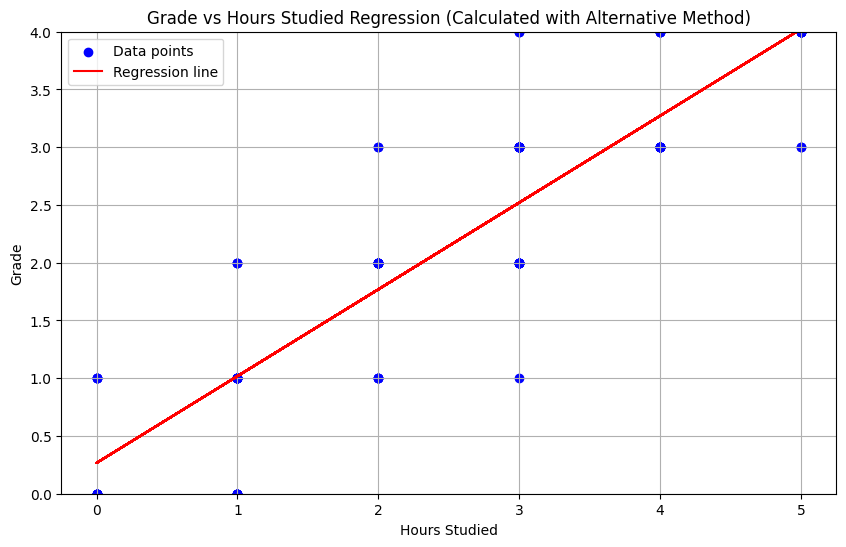

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Leer los datos del archivo CSV
data_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/grades_vs_hours_studied.csv'
data = pd.read_csv(data_path)

# Paso 2: Calcular la pendiente (m) y la ordenada al origen (b) usando el método alternativo
n = len(data)
sum_x = data['Hours_Studied'].sum()
sum_y = data['Grade'].sum()
sum_xy = (data['Hours_Studied'] * data['Grade']).sum()
sum_x_squared = (data['Hours_Studied'] ** 2).sum()

slope_m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
intercept_b = (sum_y - slope_m * sum_x) / n

# Paso 3: Graficar los datos y la línea de regresión
regression_line = slope_m * data['Hours_Studied'] + intercept_b
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Studied'], data['Grade'], color='blue', label='Data points')
plt.plot(data['Hours_Studied'], regression_line, color='red', label='Regression line')
plt.title('Grade vs Hours Studied Regression (Calculated with Alternative Method)')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.ylim(0, 4)  # eje y es de 0 a 4
plt.show()


In [9]:
# Calculate the expected grade for 2 hours of study
hours_2 = 10
expected_grade_2_hours = slope_m * hours_2 + intercept_b
expected_grade_2_hours

7.780437511206742

## ¿Cómo calcular la pendiente con el **Método Mínimos Cuadrados**?

Calcular la pendiente ($ m $) y el intercepto ($ b $) de la línea de regresión utilizando el método de mínimos cuadrados implica encontrar los valores de ($ m $) y ($ b $) que minimizan la suma del cuadrado de las diferencias (errores) entre los valores observados y los valores predichos por el modelo de regresión. Las fórmulas para calcular ($ m $) y ($ b $) utilizando el método de mínimos cuadrados son:

1. **Pendiente ($ m $)**:
   
   $ m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $
   
   donde ($ x_i $) y ($ y_i $) son los valores individuales de las variables independiente y dependiente, respectivamente, y ($ \bar{x} $) y ($ \bar{y} $) son los promedios de estas variables.

2. **Intercepto ($ b $)**:
   
   $ b = \bar{y} - m \bar{x} $

Estas fórmulas se derivan de la condición para minimizar la suma del cuadrado de los errores. Vamos a aplicar estas fórmulas para calcular ($ m $) y ($ b $) usando los datos proporcionados.

Utilizando el método de mínimos cuadrados para calcular la pendiente ($ m $) y el intercepto ($ b $) de la línea de regresión con los datos proporcionados, obtenemos los siguientes resultados:

- Pendiente ($ m $): 0.767
- Intercepto ($ b $): 0.172

Estos valores son idénticos a los que calculamos previamente, lo cual es de esperar, ya que los métodos utilizados son equivalentes para un modelo de regresión lineal simple. Con estos valores, la **ecuación de la línea de regresión** es:

$ \text{Grade} = 0.767 \times \text{Hours_Studied} + 0.172 $


## Cálculo detallado

Cálculo de la pendiente ($ m $) y el intercepto ($ b $) de la línea de regresión utilizando el método de mínimos cuadrados, paso a paso:

1. **Calcular los promedios de ($ x $) y ($ y $)**:
   - \($ ̄{x} $) es el promedio de las horas de estudio.
   - \($  ̄{y} $) es el promedio de las calificaciones.

   $ \bar{x} = \frac{\sum x_i}{n} $
   
   $ \bar{y} = \frac{\sum y_i}{n} $

   donde ($ x_i $) representa las horas de estudio, ($ y_i $) las calificaciones, y ($ n $) es el número total de observaciones.

2. **Calcular la suma de los productos de las desviaciones de \(x\) y \(y\)**:
   - Esto se refiere a sumar el producto de las diferencias entre cada valor de \(x\) y su promedio, y cada valor de \(y\) y su promedio.

   $ \sum (x_i - \bar{x})(y_i - \bar{y}) $

3. **Calcular la suma de los cuadrados de las desviaciones de ($ x $)**:
   - Esto se refiere a sumar el cuadrado de la diferencia entre cada valor de ($ x $) y su promedio.

   $ \sum (x_i - \bar{x})^2 $

4. **Calcular la pendiente ($ m $)**:
   - La pendiente se calcula dividiendo la suma de los productos de las desviaciones por la suma de los cuadrados de las desviaciones de ($ x $).

   $ m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $

5. **Calcular el intercepto ($ b $)**:
   - El intercepto se calcula utilizando los promedios y la pendiente.

   $ b = \bar{y} - m \times \bar{x} $

Vamos a aplicar estos pasos a los datos.

Aquí están los detalles de cada paso para calcular la pendiente ($ m $) y el intercepto ($ b $) utilizando el método de mínimos cuadrados:

1. **Promedios de ($ x $) y \(y\)**:
   - Promedio de horas de estudio ($ \bar{x} $): 2.36
   - Promedio de calificaciones ($ \bar{y} $): 1.99

2. **Suma de los productos de las desviaciones de ($ x $) y ($ y $)**:
   - $\sum (x_i - \bar{x})(y_i - \bar{y})$: 159.39

3. **Suma de los cuadrados de las desviaciones de ($ x $)**:
   - $\sum (x_i - \bar{x})^2 $: 207.79

4. **Pendiente ($ m $)**:
   - $ m = \frac{159.39}{207.79} $: 0.767

5. **Intercepto ($ b $))**:
   - $ b = 1.99 - 0.767 \times 2.36 $: 0.172

Por lo tanto, la ecuación de la línea de regresión es:

$ \text{Grade} = 0.767 \times \text{Hours_Studied} + 0.172 $

Este resultado muestra cómo se puede esperar que las calificaciones cambien en función de las horas de estudio, según los datos proporcionados y el modelo de regresión lineal.

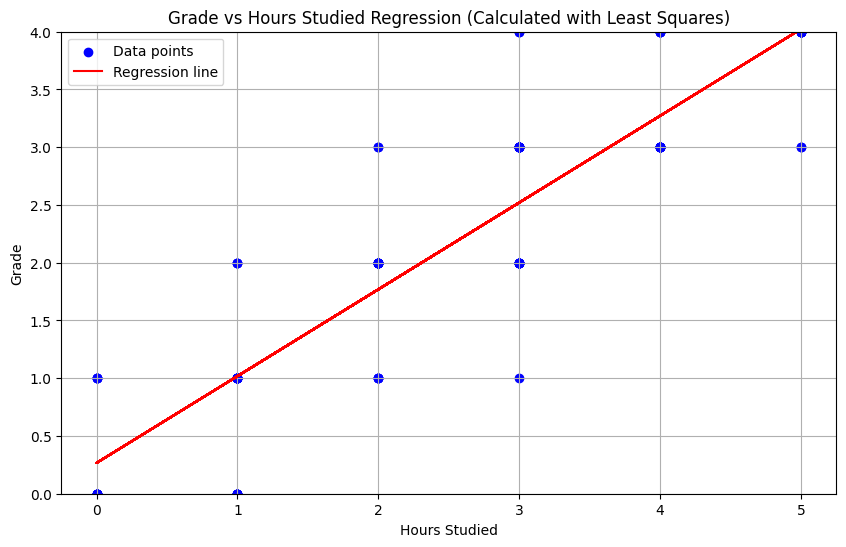

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Leer los datos del archivo CSV
data_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/grades_vs_hours_studied.csv'
data = pd.read_csv(data_path)

# Paso 2: Calcular la pendiente y el intercepto de la línea de regresión usando mínimos cuadrados
average_hours = data['Hours_Studied'].mean()
average_grade = data['Grade'].mean()
sum_dev_products = ((data['Hours_Studied'] - average_hours) * (data['Grade'] - average_grade)).sum()
sum_squares_x = ((data['Hours_Studied'] - average_hours) ** 2).sum()
slope_m = sum_dev_products / sum_squares_x
intercept_b = average_grade - slope_m * average_hours

# Paso 3: Graficar los datos y la línea de regresión
regression_line = slope_m * data['Hours_Studied'] + intercept_b
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Studied'], data['Grade'], color='blue', label='Data points')
plt.plot(data['Hours_Studied'], regression_line, color='red', label='Regression line')
plt.title('Grade vs Hours Studied Regression (Calculated with Least Squares)')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.ylim(0, 4)  # eje y es de 0 a 4
plt.show()


In [ ]:
# Calculate the expected grade for 2 hours of study
hours_2 = 2.5
expected_grade_2_hours = slope_m * hours_2 + intercept_b
expected_grade_2_hours

2.089937607225111

# Contexto  y Datos

In [ ]:
## PREPROCESAMIENTOD DE DATOS
import pandas as pd

# Cargar el archivo
file_path = 'https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/ingreso.csv'
data = pd.read_csv(file_path)

# Definir el nuevo salario por hora
salario_por_hora = 9.25

# Calcular el nuevo ingreso total
data['ingreso'] = (((data['ingreso'] / data['horas']) * salario_por_hora))/4

data = data.to_csv('ingreso_pr.csv')


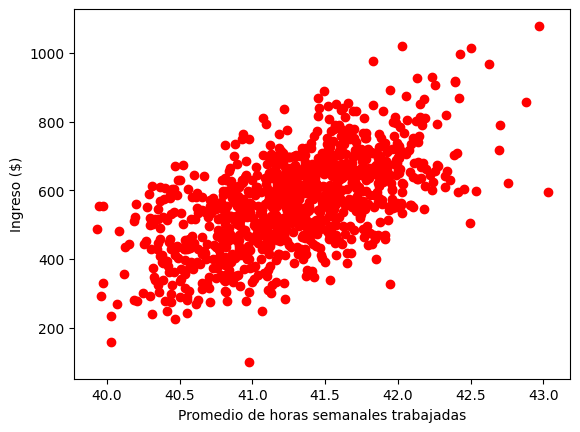

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_csv("https://raw.githubusercontent.com/jserrataylor/cursoAI/main/datos/ingreso_pr.csv", index_col=0)

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="red")
plt.show()

# Creación del Modelo de Regresión Lineal Simple

Intersección (b) -5723.213205243898
Pendiente (m) [152.3114758]


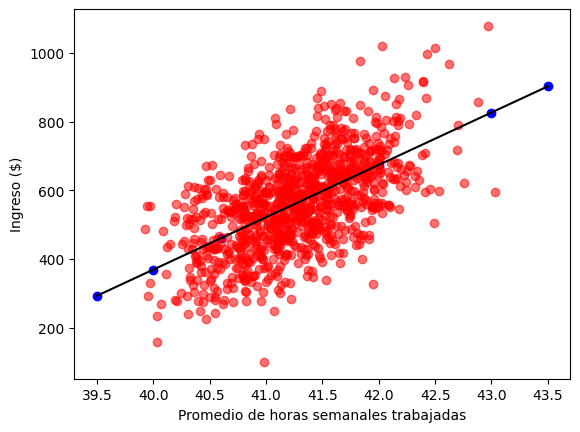

In [ ]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

horas = datos["horas"].values.reshape((-1, 1))

modelo = regresion.fit(horas, datos["ingreso"])

print("Intersección (b)", modelo.intercept_)
print("Pendiente (m)", modelo.coef_)

entrada = [[39.5], [40], [40.6], [42], [43], [43.5]]
modelo.predict(entrada)

plt.scatter(entrada, modelo.predict(entrada), color="blue")
plt.plot(entrada, modelo.predict(entrada), color="black")

plt.ylabel("Ingreso ($)")
plt.xlabel("Promedio de horas semanales trabajadas")
plt.scatter(datos["horas"], datos["ingreso"], color="red", alpha=0.55)
plt.show()


## Otros métodos para calcular la pendiente con la Varianza

El cálculo de la pendiente (\( m \)) y del intercepto (\( b \)) para una línea de regresión lineal se realiza utilizando las fórmulas de la regresión lineal simple. Aquí están los pasos detallados:

1. **Calcular los promedios**:
   - Calcula el promedio de la variable independiente (horas de estudio) y el promedio de la variable dependiente (calificaciones).
   
   $ \bar{x} = \frac{\sum x_i}{n} $
   
   $ \bar{y} = \frac{\sum y_i}{n} $

   donde \( x_i \) representa las horas de estudio, \( y_i \) las calificaciones, y \( n \) el número total de observaciones.

2. **Calcular la covarianza**:
   - La covarianza entre las horas de estudio y las calificaciones se calcula como:

   $ \text{Cov}(x, y) = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{n - 1} $

3. **Calcular la varianza**:
   - La varianza de las horas de estudio se calcula como:

   $ \text{Var}(x) = \frac{\sum (x_i - \bar{x})^2}{n - 1} $

4. **Calcular la pendiente (m)**:
   - La pendiente se calcula dividiendo la covarianza entre la varianza de la variable independiente:

   $ m = \frac{\text{Cov}(x, y)}{\text{Var}(x)} $

5. **Calcular el intercepto (b)**:
   - El intercepto se calcula utilizando los promedios y la pendiente:

   $ b = \bar{y} - m \times \bar{x} $

Estos cálculos se basan en los principios de la regresión lineal en estadística y se utilizan para determinar la mejor línea de ajuste que representa la relación entre la variable independiente (horas de estudio) y la variable dependiente (calificaciones) en un conjunto de datos.

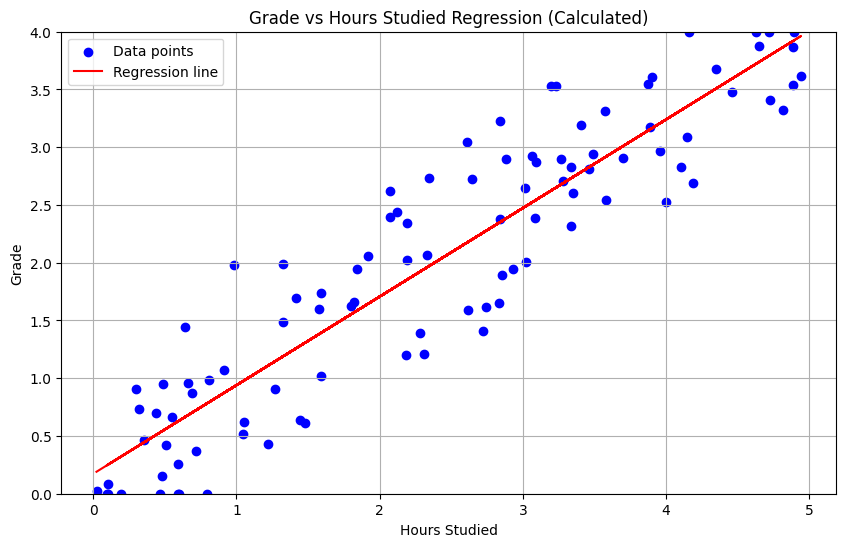

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Leer los datos del archivo CSV
data_path = 'grades_vs_hours_studied.csv'  # Reemplaza con la ruta de tu archivo
data = pd.read_csv(data_path)

# Paso 2: Calcular la pendiente y el intercepto de la línea de regresión
average_hours = data['Hours_Studied'].mean()
average_grade = data['Grade'].mean()
covariance = ((data['Hours_Studied'] - average_hours) * (data['Grade'] - average_grade)).sum() / (len(data) - 1)
variance_hours = ((data['Hours_Studied'] - average_hours) ** 2).sum() / (len(data) - 1)
slope_m = covariance / variance_hours
intercept_b = average_grade - slope_m * average_hours

# Paso 3: Graficar los datos y la línea de regresión
regression_line = slope_m * data['Hours_Studied'] + intercept_b
plt.figure(figsize=(10, 6))
plt.scatter(data['Hours_Studied'], data['Grade'], color='blue', label='Data points')
plt.plot(data['Hours_Studied'], regression_line, color='red', label='Regression line')
plt.title('Grade vs Hours Studied Regression (Calculated)')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.ylim(0, 4)  # eje y es de 0 a 4
plt.show()


In [ ]:
# Calculate the expected grade for 2 hours of study
hours_2 = 2.5
expected_grade_2_hours = slope_m * hours_2 + intercept_b
expected_grade_2_hours


2.089937607225111